# Practical example: Multiple Linear Regression on Max/MinTemperature

Multiple linear regression is a generalization of the previous case in which any number of input
variables X can be used to obtain a prediction of the y value.

Information is available on the quality of red wine from a given manufacturer of wine bottles,
including data such as the
- fixed acidit
- volatile acidity,
-  and sugar

with a total of 12 features that influence the quality of the wine.

Import required libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [19]:
# Read csv data
dataset = pd.read_csv('winequality-red.csv')

Visually analyze the data.

In [20]:
# Observe the amount of data (sample) and the features of the dataset
samples, features = dataset.shape

In [21]:
# Print the statistical information for each feature
print(samples, features)

1599 12


That means that there are 1599 samples and 12 features, and the statistical information of the given dataset is as
follows.

In [22]:
#statistical info of each feature
print(dataset.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

For the subsequent modeling, we need to perform a pre-treatment of the data, which will consist of eliminating data of the NaN type.

In [23]:
#Clean up the data and check which are the columns that contain NaN values
dataset.isnull().any()



fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [24]:
#Once che code above is executed, all colums should be false, in the case that the result True is found in a column,
# then remove all the null values with the following code:
dataset = dataset.fillna(method='ffill')

In [25]:
# MULTIPLE LINEAR REGRESSION

#independent variables
X = dataset[['fixed acidity', 'volatile acidity','citric acid', 'residual sugar',
             'chlorides','free sulfur dioxide','total sulfur dioxide', 'density',
             'pH','sulphates','alcohol']].values

#output variable
y  = dataset['quality'].values

Divide the extracted data for our model into train data, which is theoretically 80% of the total
dataset, and test data, which in this case is theoretically the remaining 20% of the dataset.

In [26]:
#train/test split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

We then define the model we want, which in this case is a linear regression model with ordinary least squares (OLS) estimation.

In [27]:
'''
Create the ols linear regression model with errors distributed as follows:
    independently and identically distributed errors, and for errors with
    heteroscedasticity or autocorrelation.
    ols ---> ordinary least squares (OLS) estimation
'''
regressor = LinearRegression()

Enter the train data into the model.

In [28]:
# Train algorithm with training set
regressor.fit(X_train,y_train)

LinearRegression()

Taking a look at the coefficients of the model, since it is a multiple linear regression, there are as
many coefficients as there are input features.

In the case of multivariate linear regression, there are as many coefficients as there are input features.

In [34]:
features = dataset.drop('quality', axis = 1)
pd.DataFrame(data=regressor.coef_, index=features.columns, columns=["Coefficient"])

,Coefficient
fixed acidity,0.041284
volatile acidity,-1.149528
citric acid,-0.177927
residual sugar,0.027870
chlorides,-1.873407
free sulfur dioxide,0.002684
total sulfur dioxide,-0.002777
density,-31.516666
pH,-0.254486
sulphates,0.924040


This means that for a one unit increase in “density”, there is a decrease of 31.51 units in the
quality of the wine. Similarly, a one unit decrease of “Chlorides” results in an increase of 1.87
units in wine quality.

In [30]:
#prediction on test set

y_pred = regressor.predict(X_test)

#difference between predicted and actual value
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

print(df)

     Actual  Predicted
0         6   5.782930
1         5   5.036193
2         7   6.596989
3         6   5.339126
4         5   5.939529
..      ...        ...
315       6   6.559757
316       4   6.017576
317       5   6.251291
318       4   5.163926
319       6   6.367205

[320 rows x 2 columns]


Next, visualize the data.

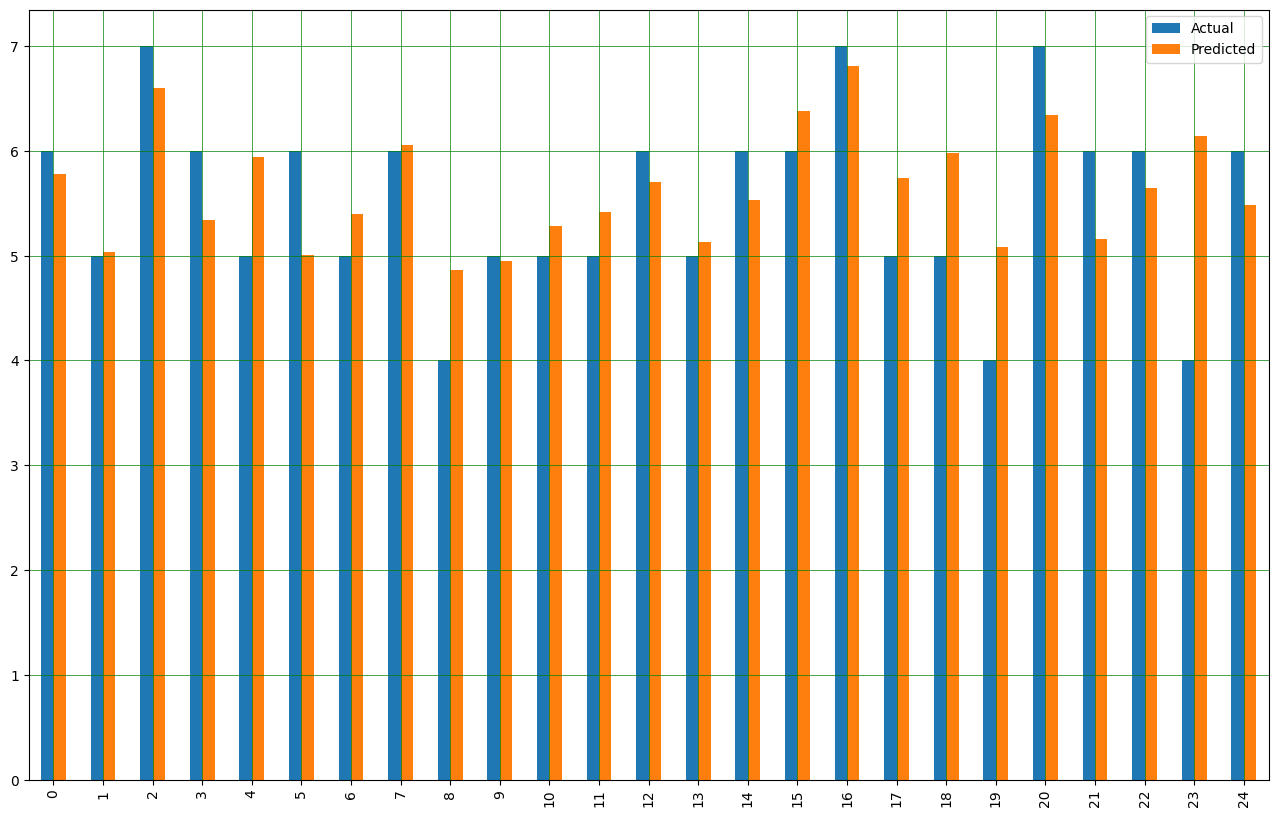

In [36]:

#visualize data
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Visualize a comparison of the data obtained through the linear regression model and the actual
data.

Calculate the most significant metrics.


In [1]:
# Metrics
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))
print('Correlation Coefficient:',metrics.r2_score(y_test, y_pred))

There are many factors that may have contributed to this inaccuracy, for example:
More data is needed: We need a large amount of data to get the best possible prediction.
Bad assumptions: We made the assumption that these data have a linear relationship,
but that may not be the case. Visualization of the data can help determine that.
Poor attributes: The attributes we used may not have a high enough correlation with the

values we are trying to predict.